<a href="https://colab.research.google.com/github/Al-ameen007/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the data and some preprocessing

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow 
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Normalizing the data and one-hot encoding the labels
from tensorflow.keras.utils import to_categorical
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# Splitting the data into training and validation sets as we want to save the test set for the evaluation of the best model
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [5]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

In [6]:
saved_models = []
histories = []

# Base Model

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), strides=(2, 2),activation='relu', kernel_initializer='truncated_normal', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
opt = optimizers.SGD(learning_rate=0.0001, momentum=0.9)
opt_1 = optimizers.SGD(learning_rate=0.05, momentum=0.9)
opt_2 = optimizers.SGD(learning_rate=0.001, momentum=0.9)
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
opt_4 = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
opt_5 = optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.1,)

In [9]:
def evaluate_model(saved_models, X, y):
  best_model, best_model_idx = saved_models[0], 0
  best_accuracy= (best_model.evaluate(X, y, verbose=1))[1]
  for i in range(1, len(saved_models)):
    loss, acc = saved_models[i].evaluate(X, y, verbose=1)
    if acc > best_accuracy:
      best_model, best_model_idx , best_accuracy= saved_models[i], i, acc
  print('model: ' + str(best_model_idx + 1), 'accuracy: ' + str('%.2f'%(best_accuracy * 100) + ' %'))
  return best_model, best_model_idx

In [10]:
def summaries(saved_models):
  for i in range(0, len(saved_models)):
    print('model: ' + str(i + 1))
    saved_models[i].summary()

# Trying differnt number of epochs

In [11]:
model_1 = keras.models.clone_model(model)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_1_history = model_1.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_1)
histories.append(model_1_history)

Epoch 1/10
1594/1594 [==============================] - 10s 5ms/step - loss: 1.9776 - accuracy: 0.4910 - val_loss: 1.4860 - val_accuracy: 0.7171
Epoch 2/10
1594/1594 [==============================] - 9s 6ms/step - loss: 0.9953 - accuracy: 0.7866 - val_loss: 0.6861 - val_accuracy: 0.8358
Epoch 3/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.5734 - accuracy: 0.8531 - val_loss: 0.4906 - val_accuracy: 0.8727
Epoch 4/10
1594/1594 [==============================] - 9s 6ms/step - loss: 0.4518 - accuracy: 0.8781 - val_loss: 0.4111 - val_accuracy: 0.8893
Epoch 5/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3943 - accuracy: 0.8904 - val_loss: 0.3665 - val_accuracy: 0.8981
Epoch 6/10
1594/1594 [==============================] - 9s 6ms/step - loss: 0.3594 - accuracy: 0.8983 - val_loss: 0.3379 - val_accuracy: 0.9044
Epoch 7/10
1594/1594 [==============================] - 10s 6ms/step - loss: 0.3346 - accuracy: 0.9042 - val_loss: 0.3160 - val_accura

In [12]:
model_2 = keras.models.clone_model(model)
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_2_history = model_2.fit(X_train, y_train, epochs=15, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_2)
histories.append(model_2_history)

Epoch 1/15
1594/1594 [==============================] - 11s 6ms/step - loss: 2.1057 - accuracy: 0.4889 - val_loss: 1.7768 - val_accuracy: 0.6504
Epoch 2/15
1594/1594 [==============================] - 9s 6ms/step - loss: 1.2422 - accuracy: 0.7332 - val_loss: 0.8336 - val_accuracy: 0.8063
Epoch 3/15
1594/1594 [==============================] - 9s 6ms/step - loss: 0.6603 - accuracy: 0.8338 - val_loss: 0.5512 - val_accuracy: 0.8562
Epoch 4/15
1594/1594 [==============================] - 9s 6ms/step - loss: 0.4910 - accuracy: 0.8679 - val_loss: 0.4458 - val_accuracy: 0.8814
Epoch 5/15
1594/1594 [==============================] - 11s 7ms/step - loss: 0.4159 - accuracy: 0.8851 - val_loss: 0.3890 - val_accuracy: 0.8920
Epoch 6/15
1594/1594 [==============================] - 9s 6ms/step - loss: 0.3721 - accuracy: 0.8951 - val_loss: 0.3519 - val_accuracy: 0.9022
Epoch 7/15
1594/1594 [==============================] - 9s 6ms/step - loss: 0.3426 - accuracy: 0.9019 - val_loss: 0.3258 - val_accurac

In [13]:
model_3 = keras.models.clone_model(model)
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_3_history = model_3.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_3)
histories.append(model_3_history)

Epoch 1/20
1594/1594 [==============================] - 10s 6ms/step - loss: 2.0464 - accuracy: 0.4906 - val_loss: 1.6305 - val_accuracy: 0.7059
Epoch 2/20
1594/1594 [==============================] - 10s 6ms/step - loss: 1.1110 - accuracy: 0.7799 - val_loss: 0.7501 - val_accuracy: 0.8276
Epoch 3/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.6106 - accuracy: 0.8487 - val_loss: 0.5168 - val_accuracy: 0.8644
Epoch 4/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.4681 - accuracy: 0.8740 - val_loss: 0.4288 - val_accuracy: 0.8849
Epoch 5/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4040 - accuracy: 0.8872 - val_loss: 0.3788 - val_accuracy: 0.8941
Epoch 6/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.3660 - accuracy: 0.8967 - val_loss: 0.3476 - val_accuracy: 0.9012
Epoch 7/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.3399 - accuracy: 0.9030 - val_loss: 0.3260 - val_accurac

In [14]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1872 - accuracy: 0.9462
model: 3 accuracy: 94.62 %


In [15]:
model_4 = keras.models.clone_model(best_model)
opt_1 = optimizers.SGD(learning_rate=0.05, momentum=0.9)
model_4.compile(optimizer=opt_1, loss='categorical_crossentropy', metrics=['accuracy'])
model_4_history = model_4.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_4)
histories.append(model_4_history)

Epoch 1/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.1634 - accuracy: 0.9480 - val_loss: 0.0717 - val_accuracy: 0.9790
Epoch 2/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0588 - val_accuracy: 0.9837
Epoch 3/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0421 - accuracy: 0.9864 - val_loss: 0.0515 - val_accuracy: 0.9844
Epoch 4/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.0550 - val_accuracy: 0.9856
Epoch 5/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0561 - val_accuracy: 0.9863
Epoch 6/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0206 - accuracy: 0.9938 - val_loss: 0.0651 - val_accuracy: 0.9847
Epoch 7/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0602 - val_accura

In [16]:
model_5 = keras.models.clone_model(best_model)
model_5.compile(optimizer=opt_2, loss='categorical_crossentropy', metrics=['accuracy'])
model_5_history = model_5.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_5)
histories.append(model_5_history)

Epoch 1/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.6905 - accuracy: 0.8103 - val_loss: 0.3178 - val_accuracy: 0.9116
Epoch 2/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.2599 - accuracy: 0.9230 - val_loss: 0.2041 - val_accuracy: 0.9420
Epoch 3/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1874 - accuracy: 0.9458 - val_loss: 0.1534 - val_accuracy: 0.9568
Epoch 4/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1445 - accuracy: 0.9580 - val_loss: 0.1284 - val_accuracy: 0.9644
Epoch 5/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.1183 - accuracy: 0.9657 - val_loss: 0.1084 - val_accuracy: 0.9699
Epoch 6/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1013 - accuracy: 0.9707 - val_loss: 0.0910 - val_accuracy: 0.9750
Epoch 7/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0892 - accuracy: 0.9739 - val_loss: 0.0858 - val_accuracy

In [17]:
model_6 = keras.models.clone_model(best_model)
model_6.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_6_history = model_6.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_6)
histories.append(model_6_history)

Epoch 1/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.2452 - accuracy: 0.9247 - val_loss: 0.1066 - val_accuracy: 0.9671
Epoch 2/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0724 - accuracy: 0.9778 - val_loss: 0.0623 - val_accuracy: 0.9822
Epoch 3/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0565 - val_accuracy: 0.9839
Epoch 4/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0399 - accuracy: 0.9874 - val_loss: 0.0434 - val_accuracy: 0.9863
Epoch 5/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0298 - accuracy: 0.9910 - val_loss: 0.0431 - val_accuracy: 0.9881
Epoch 6/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0430 - val_accuracy: 0.9873
Epoch 7/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0428 - val_accuracy

In [18]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0363 - accuracy: 0.9903
model: 6 accuracy: 99.03 %


# Trying different architectures

In [19]:
model_7 = models.Sequential()
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_7.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_7.add(layers.Flatten())
model_7.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.Dense(10, activation='softmax'))

In [20]:
model_7.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_7_history = model_7.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_7)
histories.append(model_7_history)

Epoch 1/20
1594/1594 [==============================] - 20s 12ms/step - loss: 0.1699 - accuracy: 0.9461 - val_loss: 0.0685 - val_accuracy: 0.9791
Epoch 2/20
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.0456 - val_accuracy: 0.9864
Epoch 3/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0430 - val_accuracy: 0.9872
Epoch 4/20
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.0409 - val_accuracy: 0.9877
Epoch 5/20
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.0438 - val_accuracy: 0.9884
Epoch 6/20
1594/1594 [==============================] - 27s 17ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0405 - val_accuracy: 0.9888
Epoch 7/20
1594/1594 [==============================] - 27s 17ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0441 -

In [21]:
model_8 = models.Sequential()
model_8.add(layers.Conv2D(16, (3, 3), strides = (2, 2),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_8.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(layers.Conv2D(32, (3, 3), strides = (2, 2),activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(layers.Flatten())
model_8.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.Dense(10, activation='softmax'))

In [22]:
model_8.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_8_history = model_8.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_8)
histories.append(model_8_history)

Epoch 1/20
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4432 - accuracy: 0.8571 - val_loss: 0.2458 - val_accuracy: 0.9232
Epoch 2/20
1594/1594 [==============================] - 7s 4ms/step - loss: 0.1804 - accuracy: 0.9439 - val_loss: 0.1763 - val_accuracy: 0.9447
Epoch 3/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1419 - accuracy: 0.9549 - val_loss: 0.1275 - val_accuracy: 0.9601
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1174 - accuracy: 0.9627 - val_loss: 0.1426 - val_accuracy: 0.9572
Epoch 5/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1030 - accuracy: 0.9668 - val_loss: 0.1424 - val_accuracy: 0.9563
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0984 - accuracy: 0.9681 - val_loss: 0.1267 - val_accuracy: 0.9613
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0903 - accuracy: 0.9712 - val_loss: 0.1237 - val_accuracy:

In [23]:
model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_9.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_9.add(layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform'))
model_9.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_9.add(layers.Dense(10, activation='softmax'))

In [24]:
model_9.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_9_history = model_9.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_9)
histories.append(model_9_history)

Epoch 1/20
1594/1594 [==============================] - 30s 19ms/step - loss: 0.1702 - accuracy: 0.9472 - val_loss: 0.0650 - val_accuracy: 0.9806
Epoch 2/20
1594/1594 [==============================] - 28s 17ms/step - loss: 0.0562 - accuracy: 0.9829 - val_loss: 0.0445 - val_accuracy: 0.9866
Epoch 3/20
1594/1594 [==============================] - 31s 19ms/step - loss: 0.0380 - accuracy: 0.9886 - val_loss: 0.0560 - val_accuracy: 0.9822
Epoch 4/20
1594/1594 [==============================] - 30s 19ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0425 - val_accuracy: 0.9882
Epoch 5/20
1594/1594 [==============================] - 34s 21ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 6/20
1594/1594 [==============================] - 29s 18ms/step - loss: 0.0193 - accuracy: 0.9940 - val_loss: 0.0505 - val_accuracy: 0.9864
Epoch 7/20
1594/1594 [==============================] - 27s 17ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0418 -

In [25]:
model_10 = models.Sequential()
model_10.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_10.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_10.add(layers.Flatten())
model_10.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_10.add(layers.Dense(10, activation='softmax'))

In [26]:
model_10.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_10_history = model_10.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_10)
histories.append(model_10_history)

Epoch 1/20
1594/1594 [==============================] - 42s 26ms/step - loss: 0.2396 - accuracy: 0.9282 - val_loss: 0.0921 - val_accuracy: 0.9733
Epoch 2/20
1594/1594 [==============================] - 42s 27ms/step - loss: 0.0745 - accuracy: 0.9785 - val_loss: 0.0824 - val_accuracy: 0.9754
Epoch 3/20
1594/1594 [==============================] - 46s 29ms/step - loss: 0.0496 - accuracy: 0.9852 - val_loss: 0.0561 - val_accuracy: 0.9846
Epoch 4/20
1594/1594 [==============================] - 40s 25ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0538 - val_accuracy: 0.9847
Epoch 5/20
1594/1594 [==============================] - 38s 24ms/step - loss: 0.0241 - accuracy: 0.9928 - val_loss: 0.0538 - val_accuracy: 0.9844
Epoch 6/20
1594/1594 [==============================] - 38s 24ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0524 - val_accuracy: 0.9859
Epoch 7/20
1594/1594 [==============================] - 38s 24ms/step - loss: 0.0128 - accuracy: 0.9965 - val_loss: 0.0588 -

In [27]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0571 - accuracy: 0.9875
model: 9 accuracy: 99.21 %


#Trying different batch sizes

In [28]:
model_11 = keras.models.clone_model(best_model)
model_11.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_11_history = model_11.fit(X_train, y_train, epochs=20, batch_size=16, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_11)
histories.append(model_11_history)

Epoch 1/20
3188/3188 [==============================] - 29s 9ms/step - loss: 0.1348 - accuracy: 0.9581 - val_loss: 0.0616 - val_accuracy: 0.9838
Epoch 2/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0496 - accuracy: 0.9843 - val_loss: 0.0444 - val_accuracy: 0.9880
Epoch 3/20
3188/3188 [==============================] - 27s 9ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0503 - val_accuracy: 0.9864
Epoch 4/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0427 - val_accuracy: 0.9888
Epoch 5/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0394 - val_accuracy: 0.9899
Epoch 6/20
3188/3188 [==============================] - 29s 9ms/step - loss: 0.0151 - accuracy: 0.9946 - val_loss: 0.0469 - val_accuracy: 0.9892
Epoch 7/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0135 - accuracy: 0.9951 - val_loss: 0.0500 - val_ac

In [29]:
model_12 = keras.models.clone_model(best_model)
model_12.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_12_history = model_12.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_12)
histories.append(model_12_history)

Epoch 1/20
797/797 [==============================] - 21s 26ms/step - loss: 0.2423 - accuracy: 0.9231 - val_loss: 0.0810 - val_accuracy: 0.9736
Epoch 2/20
797/797 [==============================] - 20s 25ms/step - loss: 0.0742 - accuracy: 0.9766 - val_loss: 0.0625 - val_accuracy: 0.9814
Epoch 3/20
797/797 [==============================] - 21s 26ms/step - loss: 0.0531 - accuracy: 0.9835 - val_loss: 0.0526 - val_accuracy: 0.9842
Epoch 4/20
797/797 [==============================] - 21s 26ms/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0470 - val_accuracy: 0.9861
Epoch 5/20
797/797 [==============================] - 20s 25ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0495 - val_accuracy: 0.9859
Epoch 6/20
797/797 [==============================] - 20s 25ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0482 - val_accuracy: 0.9852
Epoch 7/20
797/797 [==============================] - 21s 26ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0503 - val_accuracy:

In [30]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0397 - accuracy: 0.9898
model: 9 accuracy: 99.21 %


# Trying different activation functions

In [31]:
model_13 = models.Sequential()
model_13.add(layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer=tensorflow.keras.initializers.GlorotNormal(), input_shape=(28, 28, 1)))
model_13.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_13.add(layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer=tensorflow.keras.initializers.GlorotNormal()))
model_13.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_13.add(layers.Flatten())
model_13.add(layers.Dense(64, activation='tanh', kernel_initializer=tensorflow.keras.initializers.GlorotNormal()))
model_13.add(layers.Dense(32, activation='tanh', kernel_initializer=tensorflow.keras.initializers.GlorotNormal()))
model_13.add(layers.Dense(10, activation='softmax'))

In [32]:
model_13.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_13_history = model_13.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_13)
histories.append(model_13_history)

Epoch 1/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.2010 - accuracy: 0.9434 - val_loss: 0.0801 - val_accuracy: 0.9766
Epoch 2/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0618 - accuracy: 0.9820 - val_loss: 0.0564 - val_accuracy: 0.9850
Epoch 3/10
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0415 - accuracy: 0.9880 - val_loss: 0.0534 - val_accuracy: 0.9846
Epoch 4/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0306 - accuracy: 0.9911 - val_loss: 0.0472 - val_accuracy: 0.9860
Epoch 5/10
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0228 - accuracy: 0.9934 - val_loss: 0.0457 - val_accuracy: 0.9882
Epoch 6/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.0419 - val_accuracy: 0.9873
Epoch 7/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.0378 -

In [33]:
model_14 = models.Sequential()
model_14.add(layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal(), input_shape=(28, 28, 1)))
model_14.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_14.add(layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal()))
model_14.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_14.add(layers.Flatten())
model_14.add(layers.Dense(64, activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal()))
model_14.add(layers.Dense(32, activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal()))
model_14.add(layers.Dense(10, activation='softmax'))

In [34]:
model_14.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_14_history = model_14.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_14)
histories.append(model_14_history)

Epoch 1/10
1594/1594 [==============================] - 22s 13ms/step - loss: 0.1412 - accuracy: 0.9560 - val_loss: 0.0732 - val_accuracy: 0.9771
Epoch 2/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.0568 - val_accuracy: 0.9836
Epoch 3/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.0463 - val_accuracy: 0.9876
Epoch 4/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0258 - accuracy: 0.9911 - val_loss: 0.0617 - val_accuracy: 0.9847
Epoch 5/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0198 - accuracy: 0.9932 - val_loss: 0.0508 - val_accuracy: 0.9879
Epoch 6/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0499 - val_accuracy: 0.9877
Epoch 7/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0580 -

In [35]:
from keras.layers import LeakyReLU
model_15 = models.Sequential()
model_15.add(layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_15.add(layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_15.add(layers.Flatten())
model_15.add(layers.Dense(64, kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.Dense(32, kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.Dense(10, activation='softmax'))

In [36]:
model_15.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_15_history = model_15.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_15)
histories.append(model_15_history)

Epoch 1/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.1619 - accuracy: 0.9493 - val_loss: 0.0643 - val_accuracy: 0.9802
Epoch 2/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0503 - val_accuracy: 0.9853
Epoch 3/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0401 - val_accuracy: 0.9880
Epoch 4/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0449 - val_accuracy: 0.9878
Epoch 5/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0375 - val_accuracy: 0.9897
Epoch 6/10
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0428 - val_accuracy: 0.9889
Epoch 7/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0467 -

In [37]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0425 - accuracy: 0.9877
model: 9 accuracy: 99.21 %


# Trying different optimizers

In [38]:
model_16 = keras.models.clone_model(best_model)
model_16.compile(optimizer=opt_4, loss='categorical_crossentropy', metrics=['accuracy'])
model_16_history = model_16.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_16)
histories.append(model_16_history)

Epoch 1/10
1594/1594 [==============================] - 24s 14ms/step - loss: 0.1595 - accuracy: 0.9517 - val_loss: 0.0923 - val_accuracy: 0.9714
Epoch 2/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0915 - accuracy: 0.9734 - val_loss: 0.1047 - val_accuracy: 0.9708
Epoch 3/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0792 - accuracy: 0.9768 - val_loss: 0.0863 - val_accuracy: 0.9772
Epoch 4/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0761 - accuracy: 0.9788 - val_loss: 0.0797 - val_accuracy: 0.9802
Epoch 5/10
1594/1594 [==============================] - 23s 15ms/step - loss: 0.0687 - accuracy: 0.9810 - val_loss: 0.0858 - val_accuracy: 0.9790
Epoch 6/10
1594/1594 [==============================] - 24s 15ms/step - loss: 0.0672 - accuracy: 0.9820 - val_loss: 0.0815 - val_accuracy: 0.9814
Epoch 7/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0673 - accuracy: 0.9822 - val_loss: 0.1385 -

In [39]:
model_17 = keras.models.clone_model(best_model)
model_17.compile(optimizer=opt_5, loss='categorical_crossentropy', metrics=['accuracy'])
model_17_history = model_17.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_17)
histories.append(model_17_history)

Epoch 1/10
1594/1594 [==============================] - 24s 15ms/step - loss: 0.2071 - accuracy: 0.9460 - val_loss: 0.1278 - val_accuracy: 0.9650
Epoch 2/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.1053 - accuracy: 0.9742 - val_loss: 0.1244 - val_accuracy: 0.9722
Epoch 3/10
1594/1594 [==============================] - 22s 14ms/step - loss: 0.0979 - accuracy: 0.9768 - val_loss: 0.1124 - val_accuracy: 0.9730
Epoch 4/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0983 - accuracy: 0.9781 - val_loss: 0.1086 - val_accuracy: 0.9790
Epoch 5/10
1594/1594 [==============================] - 24s 15ms/step - loss: 0.1147 - accuracy: 0.9776 - val_loss: 0.1175 - val_accuracy: 0.9804
Epoch 6/10
1594/1594 [==============================] - 25s 15ms/step - loss: 0.1067 - accuracy: 0.9791 - val_loss: 0.0994 - val_accuracy: 0.9834
Epoch 7/10
1594/1594 [==============================] - 23s 15ms/step - loss: 0.1152 - accuracy: 0.9788 - val_loss: 0.1451 -

In [40]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2057 - accuracy: 0.9739
model: 9 accuracy: 99.21 %


# Trying different dropout rates

In [41]:
from keras.layers import Dropout

In [42]:
model_18 = models.Sequential()
model_18.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_18.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))
model_18.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_18.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_18.add(layers.Flatten())
model_18.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_18.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model_18.add(layers.Dense(10, activation='softmax'))

In [43]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_18.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_18_history = model_18.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_18)
histories.append(model_18_history)

Epoch 1/10
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1829 - accuracy: 0.9424 - val_loss: 0.0754 - val_accuracy: 0.9779
Epoch 2/10
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.0473 - val_accuracy: 0.9860
Epoch 3/10
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0379 - val_accuracy: 0.9876
Epoch 4/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0438 - val_accuracy: 0.9868
Epoch 5/10
1594/1594 [==============================] - 22s 14ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0358 - val_accuracy: 0.9904
Epoch 6/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0332 - val_accuracy: 0.9908
Epoch 7/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0339 -

In [44]:
model_19 = models.Sequential()
model_19.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_19.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_19.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_19.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_19.add(Dropout(0.4))
model_19.add(layers.Flatten())
model_19.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_19.add(Dropout(0.4))
model_19.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_19.add(Dropout(0.4))
model_19.add(layers.Dense(10, activation='softmax'))

In [45]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_19.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_19_history = model_19.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_19)
histories.append(model_19_history)

Epoch 1/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.6996 - accuracy: 0.7766 - val_loss: 0.1198 - val_accuracy: 0.9693
Epoch 2/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.3106 - accuracy: 0.9139 - val_loss: 0.0882 - val_accuracy: 0.9766
Epoch 3/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.2509 - accuracy: 0.9340 - val_loss: 0.0788 - val_accuracy: 0.9786
Epoch 4/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.2144 - accuracy: 0.9419 - val_loss: 0.0629 - val_accuracy: 0.9846
Epoch 5/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.1899 - accuracy: 0.9482 - val_loss: 0.0560 - val_accuracy: 0.9843
Epoch 6/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.1797 - accuracy: 0.9521 - val_loss: 0.0519 - val_accuracy: 0.9867
Epoch 7/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.1668 - accuracy: 0.9551 - val_loss: 0.0544 -

In [46]:
model_20 = models.Sequential()
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_20.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_20.add(Dropout(0.75))
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_20.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_20.add(layers.Flatten())
model_20.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_20.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_20.add(Dropout(0.75))
model_20.add(layers.Dense(10, activation='softmax'))

In [47]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_20.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_20_history = model_20.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_20)
histories.append(model_20_history)

Epoch 1/10
1594/1594 [==============================] - 22s 14ms/step - loss: 2.3098 - accuracy: 0.1112 - val_loss: 2.3030 - val_accuracy: 0.1101
Epoch 2/10
1594/1594 [==============================] - 21s 13ms/step - loss: 2.3019 - accuracy: 0.1110 - val_loss: 2.3023 - val_accuracy: 0.1101
Epoch 3/10
1594/1594 [==============================] - 21s 13ms/step - loss: 2.3020 - accuracy: 0.1117 - val_loss: 2.3019 - val_accuracy: 0.1101
Epoch 4/10
1594/1594 [==============================] - 21s 13ms/step - loss: 2.3019 - accuracy: 0.1111 - val_loss: 2.3020 - val_accuracy: 0.1101
Epoch 5/10
1594/1594 [==============================] - 21s 13ms/step - loss: 2.3020 - accuracy: 0.1110 - val_loss: 2.3016 - val_accuracy: 0.1101
Epoch 6/10
1594/1594 [==============================] - 21s 13ms/step - loss: 2.3018 - accuracy: 0.1119 - val_loss: 2.3026 - val_accuracy: 0.1101
Epoch 7/10
1594/1594 [==============================] - 21s 13ms/step - loss: 2.3019 - accuracy: 0.1118 - val_loss: 2.3024 -

In [48]:
model_21 = models.Sequential()
model_21.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_21.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_21.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_21.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_21.add(Dropout(0.75))
model_21.add(layers.Flatten())
model_21.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_21.add(Dropout(0.75))
model_21.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_21.add(Dropout(0.75))
model_21.add(layers.Dense(10, activation='softmax'))

In [49]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_21.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_21_history = model_21.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_21)
histories.append(model_21_history)

Epoch 1/10
1594/1594 [==============================] - 20s 12ms/step - loss: 2.2466 - accuracy: 0.1491 - val_loss: 2.0413 - val_accuracy: 0.2524
Epoch 2/10
1594/1594 [==============================] - 20s 12ms/step - loss: 2.0592 - accuracy: 0.2285 - val_loss: 1.7862 - val_accuracy: 0.3947
Epoch 3/10
1594/1594 [==============================] - 19s 12ms/step - loss: 1.8469 - accuracy: 0.3184 - val_loss: 1.3363 - val_accuracy: 0.5078
Epoch 4/10
1594/1594 [==============================] - 19s 12ms/step - loss: 1.6523 - accuracy: 0.3900 - val_loss: 1.0411 - val_accuracy: 0.6452
Epoch 5/10
1594/1594 [==============================] - 19s 12ms/step - loss: 1.5592 - accuracy: 0.4278 - val_loss: 1.0258 - val_accuracy: 0.6483
Epoch 6/10
1594/1594 [==============================] - 19s 12ms/step - loss: 1.5041 - accuracy: 0.4524 - val_loss: 1.1042 - val_accuracy: 0.6078
Epoch 7/10
1594/1594 [==============================] - 19s 12ms/step - loss: 1.4819 - accuracy: 0.4656 - val_loss: 0.9038 -

In [50]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8157 - accuracy: 0.7489
model: 9 accuracy: 99.21 %


# Models Summary

In [51]:
summaries(saved_models)

model: 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                147520    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 149,834
Trainable params: 149,834
Non-trainable params: 0
_________________________________________

 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 63,242
Trainable params: 63,242
Non-trainable params: 0
_________________________________________________________________
model: 8
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 32)          4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                     

                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                51264     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 63,242
Trainable params: 63,242
Non-trainable params: 0
_________________________________________________________________
model: 14
Model: "sequential_6"
________________________________________

                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                51264     
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 63,242
Trainable params: 63,242
Non-trainable params: 0
______

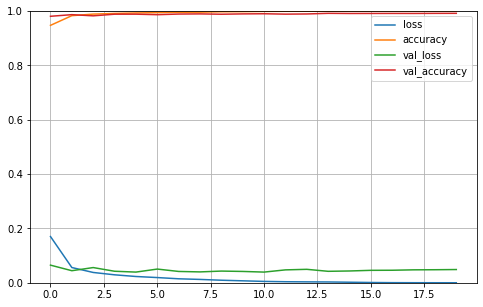

In [52]:
import pandas as pd

pd.DataFrame(histories[best_model_idx].history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

Summary of our best model, model 9 <br>
number of epochs is 20 <br>
size of batch is 32 <br>
stochastic SGD with a learning rate of 0.1 and a momentum of 0.9 <br>
we used ReLU as our activation fucntion in all the layers except for the outplut layer wher we used a softmax activation function <br>
our architecture is as follow: <br>
our first conc layer was 32 filters of size 3x3 followed by a max pool layer <br>
the second conv layer is 32 filters of size 5x5 also followed by a max pool layer <br>
we chose 1 FC layer consisting of 32 neurons followed by an output layer.

